* Évaluer les performances des modèles d’apprentissage non supervisé selon différents critères (scores, temps d'entraînement, etc.) en adaptant les paramètres afin de choisir le modèle le plus performant pour la problématique métier.

* CE1 Vous avez choisi des métriques adaptées pour évaluer les valeurs candidates pour le nombre de segments (selon algorithme, par exemple : coefficient silhouette / elbow pour le KMeans, eps/min samples pour le DBScan). 

* CE2 Vous avez évalué la forme des clusters. 

* CE3 Vous avez évalué la stabilité des clusters à l’initialisation. 

* CE4 Vous avez optimisé les hyper-paramètres pertinents dans les différents algorithmes. 

* CE5 Vous avez justifié le choix final d'algorithme et d'hyper-paramètres. 

* CE6 Vous avez analysé la stabilité du modèle dans le temps afin d’en assurer sa maintenance

* CE7 La convention PEP8 est respectée. Le code est commenté (commentaires réguliers, docstrings dans les fonctions) .

# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

# SKLEARN 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Data

In [2]:
data = pd.read_csv('data_after_aed.csv')
rfm_df = pd.read_csv('rfm_df.csv')

In [3]:
data.head()

,Unnamed: 0,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,...,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,...,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,ad2036caca61484fc435d7e673c020f2,5,NaN,NaN,2018-06-30 00:00:00,2018-07-03 11:23:16
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,...,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,bcddfa0f7d2e54cfc74bae4f01b84d92,5,NaN,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,...,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,c37a0e51e5df82bdb55d38ff0ffb6af3,5,NaN,NaN,2017-12-21 00:00:00,2017-12-21 21:42:31
4,4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,...,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,5bc7680443b4ef765fec11a8201eeb0c,5,NaN,NaN,2017-12-21 00:00:00,2017-12-22 01:10:39


# Features

In [4]:
# Charge la liste depuis le fichier pickle
with open('features_list.pkl', 'rb') as file:
    features = pickle.load(file)

print(features)

['customer_state', 'payment_value', 'payment_type', 'review_score']


## Clustering avec K-means :
* Utiliser l'algorithme K-means pour regrouper les clients en fonction de leurs caractéristiques.
* Choisir un nombre approprié de clusters en utilisant des méthodes telles que la méthode du coude ou la silhouette.

In [5]:
# Méthode du coude
rfm_df.head()

,Unnamed: 0,customer_id,frequency,monetary,recency
0,0,00012a2ce6f8dcda20d059ce98491703,1,114.74,337
1,1,000161a058600d5901f007fab4c27140,1,67.41,458
2,2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,596
3,3,0002414f95344307404f0ace7a26f1d5,1,179.35,427
4,4,000379cdec625522490c315e70c7a9fb,1,107.01,198


/Users/tarek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tarek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tarek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tarek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tarek/anacond

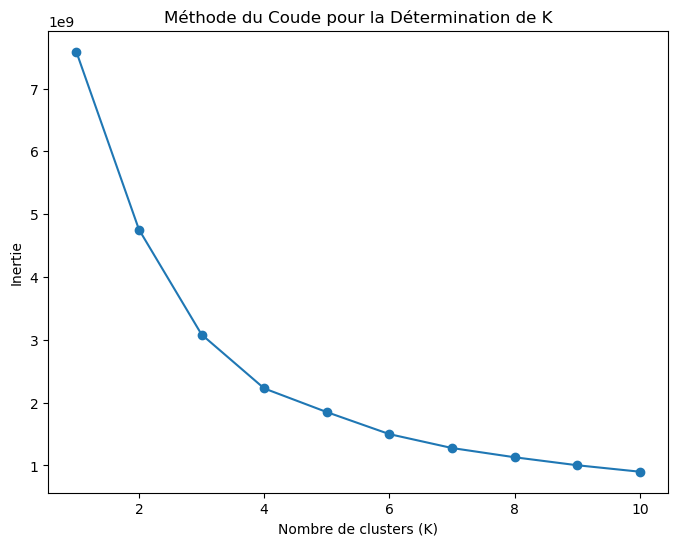

/Users/tarek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Unnamed: 0                       customer_id  frequency  monetary  recency  \
0           0  00012a2ce6f8dcda20d059ce98491703          1    114.74      337   
1           1  000161a058600d5901f007fab4c27140          1     67.41      458   
2           2  0001fd6190edaaf884bcaf3d49edf079          1    195.42      596   
3           3  0002414f95344307404f0ace7a26f1d5          1    179.35      427   
4           4  000379cdec625522490c315e70c7a9fb          1    107.01      198   

   cluster  
0        0  
1        0  
2        0  
3        0  
4        1  


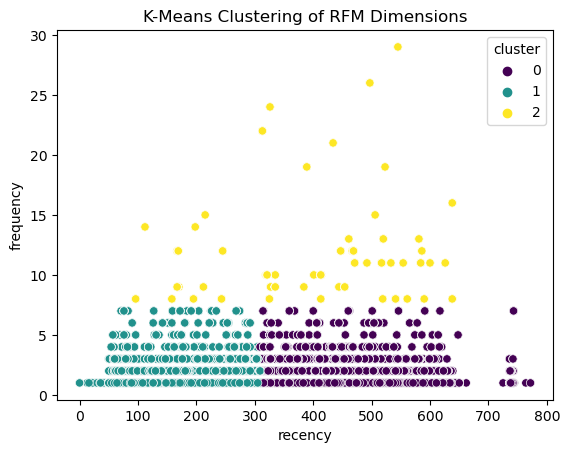

In [6]:
# Select RFM columns
rfm_data = rfm_df[['recency', 'frequency', 'monetary']]

# Standardize the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

# Méthode du coude
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_data)
    inertia.append(kmeans.inertia_)

# Tracé du coude
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Méthode du Coude pour la Détermination de K')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')
plt.show()

# Appliquer le KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
rfm_df['cluster'] = kmeans.fit_predict(rfm_scaled)

# Afficher les résultats
print(rfm_df.head())


sns.scatterplot(data=rfm_df, x='recency', y='frequency', hue='cluster', palette='viridis')
plt.title('K-Means Clustering of RFM Dimensions')
plt.show()

Text(0.5, 0.92, 'K-Means Clustering of RFM Dimensions in 3D')

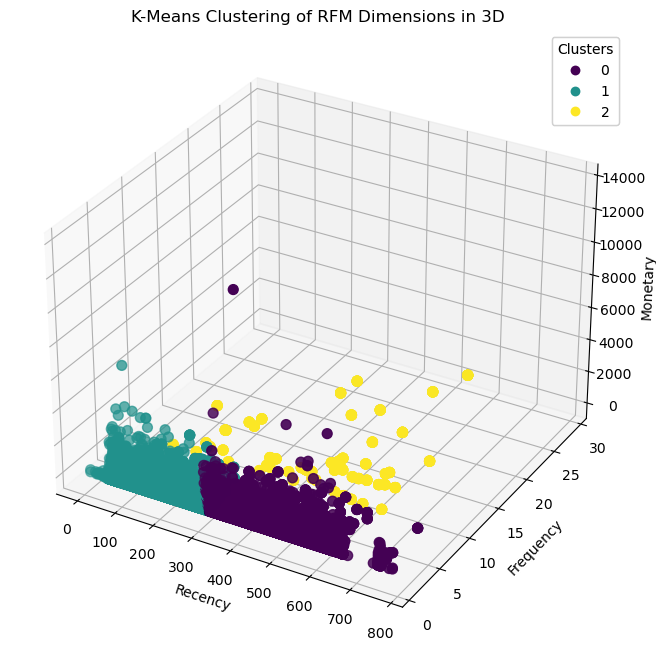

In [14]:
from mpl_toolkits.mplot3d import Axes3D

# Sélectionner les colonnes RFM et les données cluster
rfm_clustered = rfm_df[['recency', 'frequency', 'monetary', 'cluster']]

# Créer une figure en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tracé des points en fonction des dimensions RFM et de la couleur en fonction du cluster
scatter = ax.scatter(
    rfm_clustered['recency'],
    rfm_clustered['frequency'],
    rfm_clustered['monetary'],
    c=rfm_clustered['cluster'],
    cmap='viridis',
    s=50  # Taille des points
)

# Ajouter une légende
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)

# Étiquettes et titre
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('K-Means Clustering of RFM Dimensions in 3D')

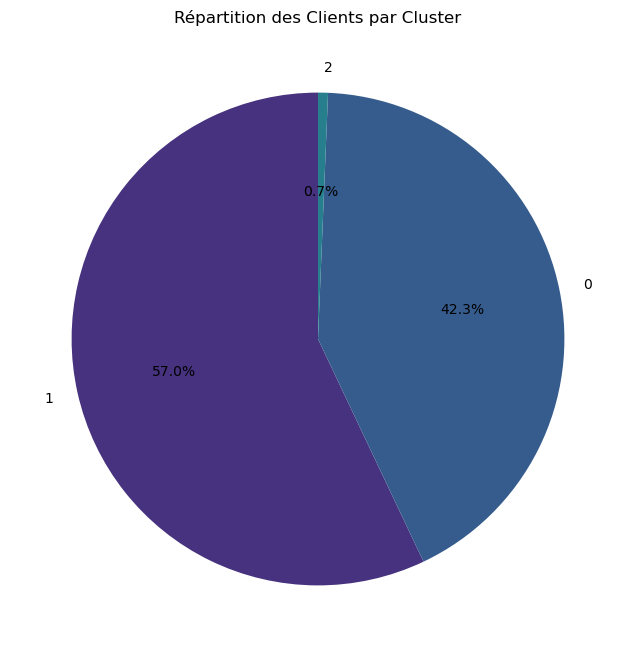

In [15]:
# Compter le nombre de clients dans chaque cluster
cluster_counts = rfm_df['cluster'].value_counts()

# Tracé du pie chart
plt.figure(figsize=(8, 8))
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Répartition des Clients par Cluster')
plt.show()


In [7]:
# Encodage one-hot pour 'customer_state' et 'payment_type'
data = pd.get_dummies(data, columns=['customer_state', 'payment_type'])

# Sélection des features après l'encodage one-hot
encoded_features = [col for col in data.columns if col.startswith('customer_state_') or col.startswith('payment_type_')]

# Sélection des features pour la normalisation
features_for_scaling = ['payment_value', 'review_score']

# Normalisation des données
scaler = StandardScaler()
data[features_for_scaling] = scaler.fit_transform(data[features_for_scaling])

# Sélection des features finaux
selected_features = ['payment_value', 'review_score'] + encoded_features





# Data for KMeans cluster

In [8]:
# Filtrage du DataFrame
data_cluster = data[selected_features]

In [9]:
print(selected_features)

['payment_value', 'review_score', 'customer_state_AC', 'customer_state_AL', 'customer_state_AM', 'customer_state_AP', 'customer_state_BA', 'customer_state_CE', 'customer_state_DF', 'customer_state_ES', 'customer_state_GO', 'customer_state_MA', 'customer_state_MG', 'customer_state_MS', 'customer_state_MT', 'customer_state_PA', 'customer_state_PB', 'customer_state_PE', 'customer_state_PI', 'customer_state_PR', 'customer_state_RJ', 'customer_state_RN', 'customer_state_RO', 'customer_state_RR', 'customer_state_RS', 'customer_state_SC', 'customer_state_SE', 'customer_state_SP', 'customer_state_TO', 'payment_type_boleto', 'payment_type_credit_card', 'payment_type_debit_card', 'payment_type_not_defined', 'payment_type_voucher']


/Users/tarek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tarek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tarek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tarek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tarek/anacond

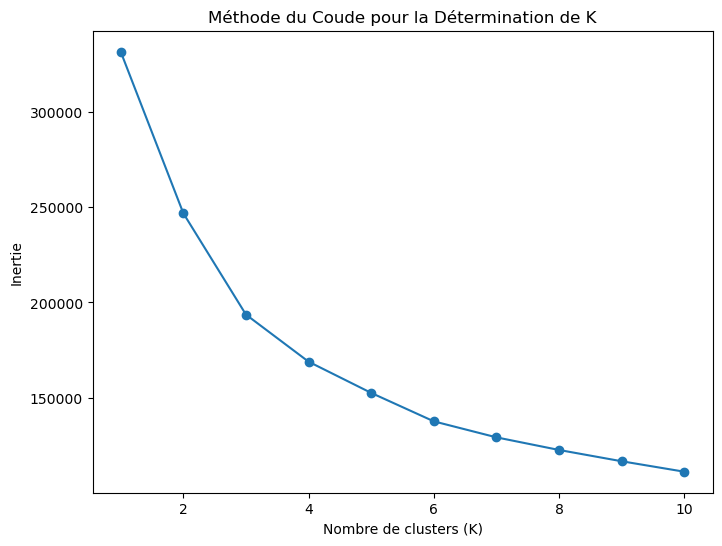

In [10]:


# Features après échelle et transformation
features = ['payment_value', 'review_score', 'customer_state_AC', 'customer_state_AL', 'customer_state_AM', 'customer_state_AP', 'customer_state_BA', 'customer_state_CE', 'customer_state_DF', 'customer_state_ES', 'customer_state_GO', 'customer_state_MA', 'customer_state_MG', 'customer_state_MS', 'customer_state_MT', 'customer_state_PA', 'customer_state_PB', 'customer_state_PE', 'customer_state_PI', 'customer_state_PR', 'customer_state_RJ', 'customer_state_RN', 'customer_state_RO', 'customer_state_RR', 'customer_state_RS', 'customer_state_SC', 'customer_state_SE', 'customer_state_SP', 'customer_state_TO', 'payment_type_boleto', 'payment_type_credit_card', 'payment_type_debit_card', 'payment_type_not_defined', 'payment_type_voucher']

# Méthode du coude
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_cluster)
    inertia.append(kmeans.inertia_)

# Tracé du coude
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Méthode du Coude pour la Détermination de K')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')
plt.show()

/Users/tarek/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/_m/r5l1c8n15kgb_gt5vpck03_w0000gn/T/ipykernel_37291/4079232181.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cluster['cluster'] = kmeans.fit_predict(data_cluster)


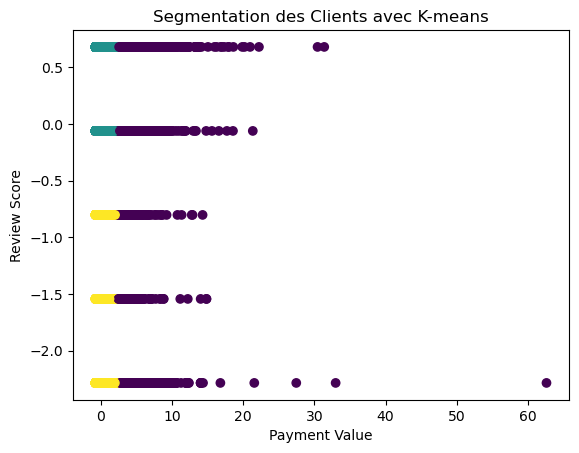

In [11]:
# Choisir le nombre optimal de clusters
optimal_k = 3

# Appliquer K-means
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data_cluster['cluster'] = kmeans.fit_predict(data_cluster)

# Visualisation des clusters (utilisez différentes combinaisons de features selon vos besoins)
plt.scatter(data_cluster['payment_value'], data_cluster['review_score'], c=data_cluster['cluster'], cmap='viridis')
plt.title('Segmentation des Clients avec K-means')
plt.xlabel('Payment Value')
plt.ylabel('Review Score')
plt.show()

In [12]:
cluster_means = data_cluster.groupby('cluster').mean()
print(cluster_means)

         payment_value  review_score  customer_state_AC  customer_state_AL  \
cluster                                                                      
0             4.483983     -0.051453           0.001484           0.011499   
1            -0.134195      0.493249           0.000758           0.003561   
2            -0.071147     -1.648257           0.000905           0.005174   

         customer_state_AM  customer_state_AP  customer_state_BA  \
cluster                                                            
0                 0.001855           0.001855           0.045252   
1                 0.001543           0.000668           0.031728   
2                 0.001207           0.000517           0.042942   

         customer_state_CE  customer_state_DF  customer_state_ES  ...  \
cluster                                                           ...   
0                 0.022626           0.023739           0.016691  ...   
1                 0.012149           0.021250    

# PCA 

(3, 6)